# Investigation of Incidents of Theft from Vehicle in the City of Vancouver Strathcona and Kitsilano Neighbourhoods
---

## 1.0 Introduction

The true cost of crime encompasses a wide range of factors that extend beyond the immediate impact of the crime itself.  Gabor (2014) identifies four broad categories that contribute to the aggregate cost of crime, including: (1) victim costs, (2) criminal justice costs, (3) opportunity costs, and (4) intangible costs.

While the true cost of crime is difficult to quantify, and Canadian data does not permit an annual assessment of the cost at this time, a 2014 study published by the Fraser Institute (Easton et al. 2014) estimates that Canadians spend over $85 billion annually being victimized by, catching, and punishing crime. Undoubtedly crime, and the associated costs, pose a significant burden to society.  More accurate information on crime could guide our legal, political, and cultural stance toward crime and allow informed prioritization and development of programs that curtail criminal activity (Anderson, 1999).

The Vancouver Police Department (VPD) crime data set, publicly available from the [VPD open data portal](https://geodash.vpd.ca/opendata/), contains 10 variables related to 854,615 reported crime incidents in the City of Vancouver between 2003 and 2022, as follows:

|Variable | Description |
|---------| ----------- |
| TYPE    | Type of crime activity (11 unique types)             |
| YEAR    | A four-digit field that indicates the year when the reported crime activity occurred |
| MONTH   | A numeric field that indicates the month when the reported crime activity occurred |
| DAY     | A two-digit field that indicates the day of the month when the reported crime activity occurred |
| HOUR    | A two-digit field that indicates the hour time (in 24 hours format) when the reported crime activity occurred |
| MINUTE  | A two-digit field that indicates the minute when the reported crime activity occurred |
| HUNDRED_BLOCK | Generalized location of the reported crime activity |
| NEIGHBOURHOOD | Vancouver neighbourhood location of reported crime activity (24 unique neighbourhoods) |
| X             | X-coordinate location of reported crime activity (UTM Zone 10) |
| Y             | Y-coordinate location of reported crime activity (UTM Zone 10) |

We consider the VPD crime data set to represent a sample of all crime incidents that occurred in Vancouver between 2003 and 2022.  This project aims to answer a question of the form: can we use the VPD data set to determine whether certain Vancouver neighbourhoods experience higher annual incidents of crime relative to others?  

To focus our analysis, we will constrain the crime type to *Theft from Vehicle* (property theft from vehicle) considering that this represents the highest proportion (27.9%) of reported crime incidents in the data set. Furthermore, a reasonable hypothesis may be that the annual number of theft from vehicle incidents is higher in poorer neighbourhoods. 2016 median household income data for the Strathcona and Kitsilano neighbourhoods, available from the [Canada Mortgage and Housing Corporation (CMHC) website](https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/TableMatchingCriteria?GeographyType=MetropolitanMajorArea&GeographyId=2410&CategoryLevel1=Population%2C%20Households%20and%20Housing%20Stock&CategoryLevel2=Household%20Income&ColumnField=HouseholdIncomeRange&RowField=Neighbourhood&SearchTags%5B0%5D.Key=Households&SearchTags%5B0%5D.Value=Number&SearchTags%5B1%5D.Key=Statistics&SearchTags%5B1%5D.Value=AverageAndMedian), is reported to be approximately  \\$23,000 and \\$70,000, respectively.  We therefore refine our objective to answer the specific question: **are annual incidents of *Theft from Vehicle* higher in Strathcona than in Kitsilano?**  We will use a point estimate of the mean difference in annual incidents of *Theft from Vehicle* in the Strathcona and Kitsilano neighbourhoods and statistical inference to answer this question.

<img src= https://vpd.ca/wp-content/uploads/2021/05/header-crest-base.png height="200" width="200"/>

Image source: https://vpd.ca/wp-content/uploads/2021/05/header-crest-base.png

## 2.0 Methods and Results
### 2.1 Preliminary Results

In the preliminary analysis, we read the VPD crime data set from GitHub into R and clean and wrangle the data into a tidy format. **Table 1** provides a glimpse of the first six rows of the raw data set. From the initial set of 10 variables we select the three that are relevant to our analysis: `TYPE`, `YEAR` and `NEIGHBOURHOOD`, and remove any observations from 2023 as this data is incomplete.   **Table 2** is a summary of the count and proportion of crime incidents by `TYPE`.  Our crime type of interest, *Theft from Vehicle* incidents in the Strathcona and Kitsilano neighbourhoods, is then filtered from the data set and summarized to provide a count of incidents per year (**Table 3**).  Summary statistics  (mean, min., max., and standard deviation) for the annual number of *Theft from Vehicle* incidents in the Strathcona and Kitsilano neighbourhoods between 2003 and 2022 is provided in **Table 4**.

Histogram and boxplot visualizations showing the distributions of annual *Theft from Vehicle* incidents between 2003 and 2022 for the Kitsilano and Strathcona neighbourhoods are shown on **Figure 1 and 2**, respectively.  The histogram of  incidents for Kitsilano is bi-modal and slightly right-skewed, while the histogram of incidents for Strathcona is unimodal and slightly right-skewed.  The boxplot visualization indicates that the median (black line) and mean (red dot) number of *Theft from Vehicle* incidents are similar between the two neighbourhoods (Strathcona median and mean are marginally greater), but the variability (spread) of the distribution of incidents in Strathcona is wider. 

Based on the preliminary analysis results summarized in **Table 4** and shown on **Figures 1 and 2**, we see that the mean annual *Theft from Vehicle* incidents in the Strathcona sample (644.40) is greater than the mean annual incidents in the Kitsilano sample (588.45), equating to a mean difference of approximately 56.  The variability (spread) of the Strathcona and Kitsilano *Theft from Vehicle* incident distributions is measured by the standard deviation (**Table 4**).  The standard deviation of the number of *Theft from Vehicle* incidents in the Strathcona sample (248.82) is greater than the Kitsilano sample (192.83).     


In [1]:
# load libraries
library(tidyverse)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#-------------------------------------------------------
# Code to load data into R, clean, wrangle and summarize
#-------------------------------------------------------

# read data set from GitHub
crime_data_raw <- read_csv("https://github.com/jburden1/STAT201_Project_Group14/raw/main/vpd_crime_data/crimedata_csv_AllNeighbourhoods_AllYears.csv")

# select TYPE, YEAR, and NEIGHBOURHOOD and remove observations from 2023
crime_data_tidy <- crime_data_raw |> 
    select(TYPE, YEAR, NEIGHBOURHOOD) |> 
    filter(YEAR != 2023)

# summarize data by crime TYPE
crime_data_type_summary <- crime_data_tidy |>
    group_by(TYPE) |>
    summarize(INCIDENT_COUNT = n(), PROPORTION = INCIDENT_COUNT / nrow(crime_data_tidy)) |>
    arrange(desc(INCIDENT_COUNT))
    
# get yearly theft from vehicle incident counts in Strathcona and Kitsilano NEIGHBOURHOOD
crime_vehicle_filtered <- crime_data_tidy |>
    filter(TYPE == "Theft from Vehicle", NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD == "Kitsilano") |>
    group_by(YEAR, NEIGHBOURHOOD) |>
    summarize(INCIDENT_COUNT = n()) |>
    arrange(desc(NEIGHBOURHOOD))
# pivot data to improve readability 
crime_vehicle_filtered_wide <- crime_vehicle_filtered |>
    pivot_wider(names_from = YEAR, values_from = INCIDENT_COUNT)

# calculate summary statstics
crime_vehicle_stats <- crime_vehicle_filtered |>
    ungroup() |>
    group_by(NEIGHBOURHOOD) |>
    summarize(n = n(), Mean = mean(INCIDENT_COUNT), Min = min(INCIDENT_COUNT), Max = max(INCIDENT_COUNT), SD = sd(INCIDENT_COUNT)) 

Rows: 854615 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


**Table 1:** First six rows of VPD crime data set

In [3]:
# print Table 1
head(crime_data_raw)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft from Vehicle,2018,3,22,9,0,19XX TRIUMPH ST,Grandview-Woodland,495329.0,5459026
Theft from Vehicle,2004,4,6,7,0,19XX TRIUMPH ST,Grandview-Woodland,495341.2,5459026
Theft from Vehicle,2003,2,24,0,0,19XX TRIUMPH ST,Grandview-Woodland,495354.4,5459026
Theft from Vehicle,2019,8,19,16,0,19XX TRIUMPH ST,Grandview-Woodland,495354.4,5459026
Theft from Vehicle,2018,11,8,1,0,19XX TRIUMPH ST,Grandview-Woodland,495356.6,5459026
Theft from Vehicle,2005,10,15,12,0,19XX TRIUMPH ST,Grandview-Woodland,495357.0,5459017


**Table 2:** Summary of crime incidents by type for all neighbourhoods between 2003 and 2022.

In [4]:
# print Table 2
crime_data_type_summary

TYPE,INCIDENT_COUNT,PROPORTION
<chr>,<int>,<dbl>
Theft from Vehicle,236890,0.2791631117
Other Theft,208920,0.2462018544
Mischief,101821,0.1199909966
Offence Against a Person,73561,0.0866879888
Break and Enter Residential/Other,71483,0.0842391689
Break and Enter Commercial,46281,0.0545398623
Theft of Vehicle,44283,0.0521853184
Theft of Bicycle,36303,0.0427812843
Vehicle Collision or Pedestrian Struck (with Injury),28387,0.0334526711


**Table 3:** Number of Theft from Vehicle incidents in the Strathcona and Kitsilano neighbourhoods between 2003 and 2022.

In [5]:
# print Table 3
crime_vehicle_filtered_wide 

NEIGHBOURHOOD,2003,2004,2005,2006,2007,2008,2009,2010,2011,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Strathcona,1155,1066,977,697,627,522,501,407,393,⋯,328,519,523,754,732,878,946,638,375,472
Kitsilano,871,884,955,857,516,478,574,461,396,⋯,405,515,558,671,603,753,652,545,349,256


**Table 4:** Summary statsitics (mean, min., max., and standard deviation) for the annual number of Theft from Vehicle incidents in the Strathcona and Kitsilano neighbourhoods between 2003 and 2022.

In [6]:
# print Table 4
crime_vehicle_stats

NEIGHBOURHOOD,n,Mean,Min,Max,SD
<chr>,<int>,<dbl>,<int>,<int>,<dbl>
Kitsilano,20,588.45,256,955,192.8314
Strathcona,20,644.40,328,1155,248.8241


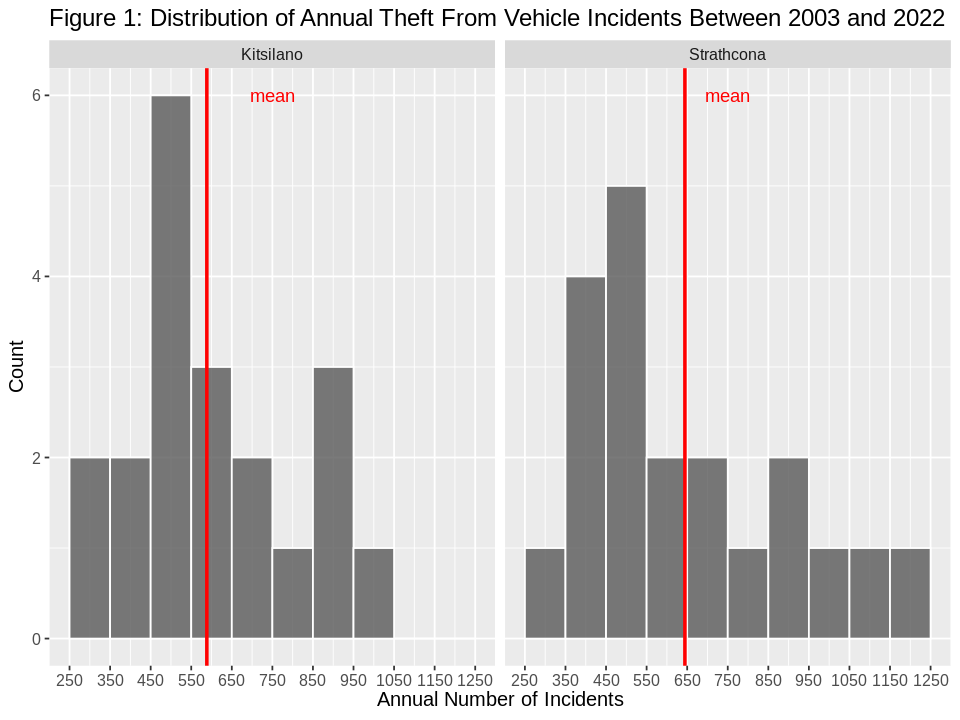

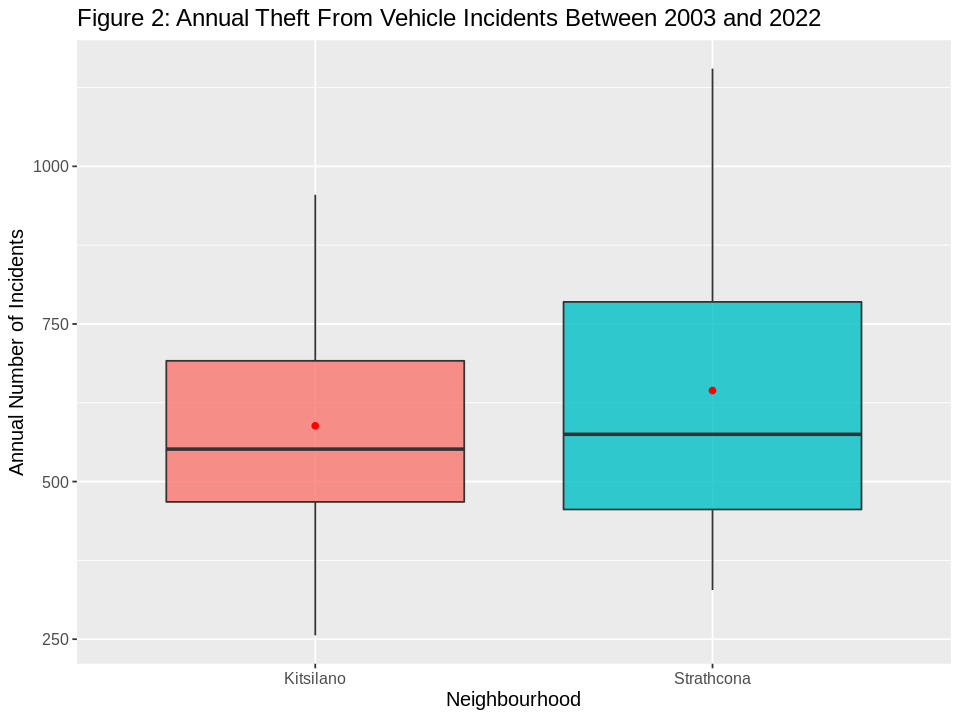

In [7]:
#-------------------------------------------------------
# Code to create histogram and boxplot visualizations
#-------------------------------------------------------

options(repr.plot.width = 8, repr.plot.height = 6)

# historgram
crime_hist <- crime_vehicle_filtered |>
    ggplot() +
    geom_histogram(aes(x = INCIDENT_COUNT), color = "white", binwidth = 100, alpha = 0.8) +
    scale_x_continuous(breaks = seq(250, 1250, 100)) +
    geom_vline(data = crime_vehicle_stats, mapping = aes(xintercept = Mean), color = "red", size = 1) +
    facet_wrap(~NEIGHBOURHOOD) +
    xlab("Annual Number of Incidents") +
    ylab("Count") +
    ggtitle("Figure 1: Distribution of Annual Theft From Vehicle Incidents Between 2003 and 2022") +
    annotate("text", x = 750, y = 6, label = "mean", angle = 0, color = "red") +
    theme(text = element_text(size = 12))
crime_hist
    
# boxplot
crime_box <- crime_vehicle_filtered |>
    ggplot(aes(x = NEIGHBOURHOOD, y = INCIDENT_COUNT)) +
    geom_boxplot(aes(fill = NEIGHBOURHOOD), alpha = 0.8, show.legend = FALSE) +
    stat_summary(fun = "mean", geom = "point", color = "red") +
    xlab("Neighbourhood") +
    ylab("Annual Number of Incidents") +
    ggtitle("Figure 2: Annual Theft From Vehicle Incidents Between 2003 and 2022") +
    theme(text = element_text(size = 12))
crime_box 

### 2.2 Methods

The point estimate for the mean difference in annual *Theft from Vehicle* incidents between the Strathcona and Kitsilano neighbourhoods is about 56.  This point estimate represents our best approximation of the parameter of interest, the true mean difference in annual *Theft from Vehicle* incidents between the Strathcona and Kitsilano neighbourhoods, based on the sample data. To quantify the error in our estimate, we developed a 90% confidence interval, defining a range of values that plausibly contain the true parameter value.  In addition, to test whether the mean difference is statistically significant, we carried out a one-sided hypothesis test at a 5% significance level, based on the following null and alternative hypotheses:

**In words**  
$H_0:$ the mean number of annual *Theft from Vehicle* incidents is the same for both the Strathcona and Kitsilano neighbourhoods.  
$H_A:$ the mean number of annual *Theft from Vehicle* incidents is greater in the Strathcona neighbourhood than the Kitsilano neighbourhood.

**In symbols**  
$H_0:$ $\mu_{strath} - \mu_{kits} = 0$  
$H_A:$ $\mu_{strath} - \mu_{kits} > 0$  
where $\mu$ represents the mean number of annual *Theft from Vehicle* incidents.

The 90% confidence interval estimate and the results of the one-sided hypothesis test at a 5% significance level provide evidence to conclude whether the observed mean difference of 56 is meaningful or can be attributed to sampling variation. Confidence interval calculation and hypothesis testing was carried out using  both simulation (bootstrapping and permutation) and asymptotic (theory based) methods.  A summary of the analyses and results is provided in Section 2.3.

Based on visual inspection of the boxplot in **Figure 2**, we have reason to believe that no difference exists between the annual incidents of *Theft from Vehicle* between the Strathcona and Kitsilano neighbourhoods. The distributions of incidents seem similar and the means fall in roughly the same place.

### 2.3 Results
#### 2.3.1 Simulation Method

Simulation-based hypothesis testing was carried out using the `infer` package and the following workflow: 
1. Calculate the test statistic (difference in means) for the observed data. 
    * `specify()` the variables of interest.
    * `calculate()` the test statistic for the observed data.
2. Construct the null distribution (simulated sampling distribution of the test statistic based on 10000 shuffles of the observed data assuming $H_0$ is true).
    * `specify()` the variables of interest.
    * `hypothesize()` the null hypothesis $H_0$ (`null = "independence"`) for hypotheses involving two samples.
    * `generate()` 10000 shuffles of the observed data assuming $H_0$ is true (simulate data).
    * `calculate()` the test statistic for the simulated data. 
3. Visualize the null distribution, observed test statistic, and p-value region (**Figure 3**).
    * `visualize()`.
4. Calculate the p-value 
    * `get_pvalue()`.

Simulation-based calculation of a 90% confidence interval for the true difference in mean *Theft from Vehicle* incidents between the Strathcona and Kitsilano neighbourhoods was carried out using the `infer` package and the following workflow:
1. Construct a simulated bootstrap distribution of the test statistic using 10000 repetitions.
    * `specify()` the variables of interest.
    * `generate()` 10000 bootstrap samples (simulated data).
    * `calculate()` the test statistic for the simulated data. 
2. Calculate the 90% confidence interval. 
    * `get_ci()`.
3. Visualize the bootstrap distribution and 90% confidence level (**Figure 4**). 
    * `visualize()`.

In [8]:
###################
# Simulation Method 
###################

# set random seed
set.seed(201)

#----------------
# Hypothesis Test
#----------------

# 1. calculate the test statistic for the observed data
d_hat <- crime_vehicle_filtered %>%
    specify(INCIDENT_COUNT ~ NEIGHBOURHOOD) %>%
    calculate(
        stat = "diff in means",
        order = c("Strathcona", "Kitsilano")
    )

# 2. construct the null distribution
null_distribution <- crime_vehicle_filtered %>%
    specify(INCIDENT_COUNT ~ NEIGHBOURHOOD) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>%
    calculate(
        stat = "diff in means",
        order = c("Strathcona", "Kitsilano")
    )

# 3. visual the null distribution, test statistic and p-value
null_distribution_plot <- null_distribution %>% 
    visualize() +
    shade_p_value(obs_stat = d_hat, direction = "right") +
    ylab("Count") +
    xlab("Simulated Difference in Mean Theft from Vehicle Incidents") +
    ggtitle("Figure 3: Simulation-Based Null Distribution with Test Statistic and Shaded P-Value") +
    theme(text = element_text(size = 12))
    

#  4.calculate the p-value
pvalue_sim <- null_distribution %>%
    get_pvalue(obs_stat = d_hat, direction = "right")

#------------------------
# 90% Confidence Interval
#------------------------

# 1. construct bootstrap distribution
boot_distribution <- crime_vehicle_filtered %>%
    specify(INCIDENT_COUNT ~ NEIGHBOURHOOD) %>%
    generate(reps = 10000, type = "bootstrap") %>%
    calculate(
        stat = "diff in means",
        order = c("Strathcona", "Kitsilano")
    )

# 2. calculate 90% confidence interval
ci_sim <- boot_distribution %>%
    get_ci(level = 0.90)

# 3. visualize bootstrap distribution and 90% confidence interval
boot_distribution_plot <- boot_distribution %>%
    visualize() +
    shade_ci(endpoints = ci_sim) +
    ylab("Count") +
    xlab("Simulated Difference in Mean Theft from Vehicle Incidents") +
    ggtitle("Figure 4: Simulation-Based Bootstrap Distribution with 90% Confidence Interval") +
    theme(text = element_text(size = 12))
    

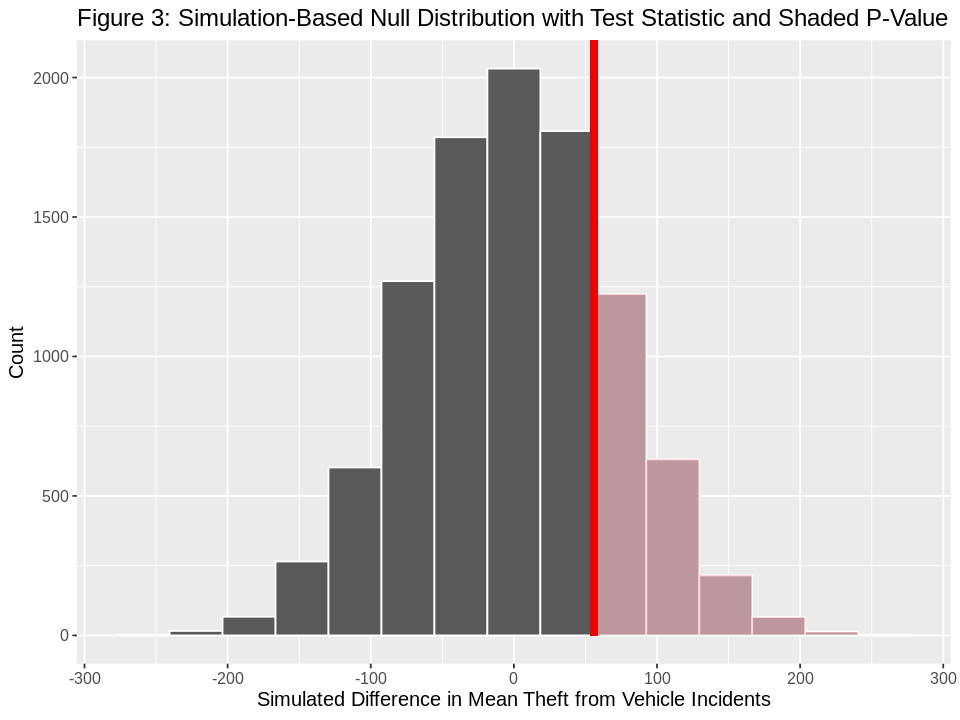

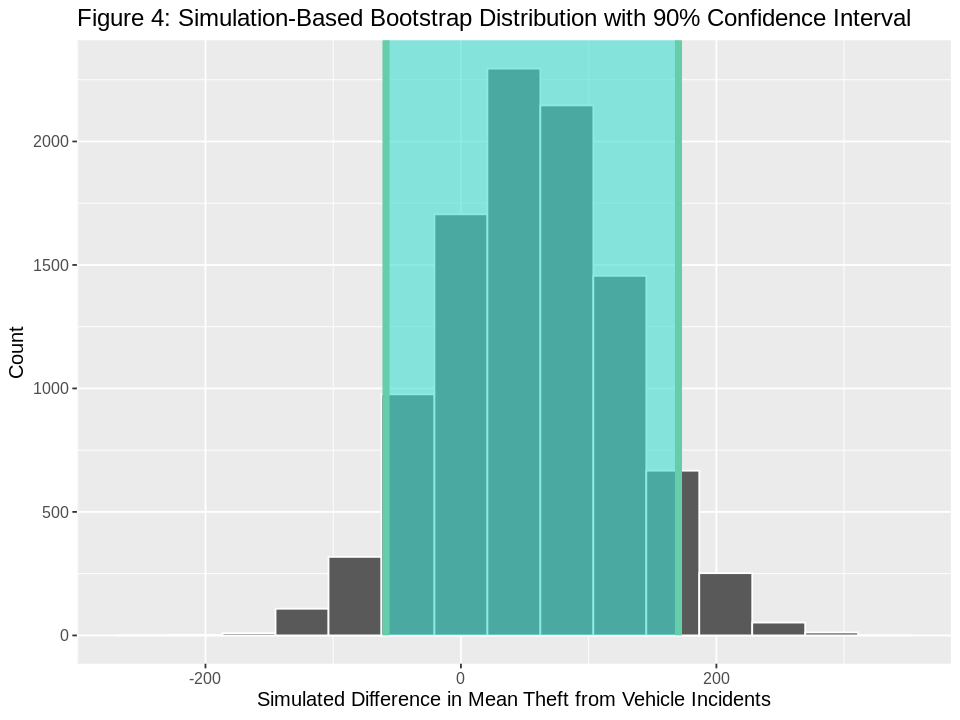

In [9]:
# plot Figures 3 and 4
null_distribution_plot
boot_distribution_plot

#### 2.3.2 Asymptotic Method

In order to use the asymptotic method, we check if the following conditions are met:

1. *Independent observations:* The observations are independent in both groups.

    We assume that the *Theft from Vehicle* incidents reported represent a random sample of all incidents in each of the Strathcona and Kitsilano  neighbourhoods.

2. *Approximately normal:* The distribution of the response for each group should be normal or the sample sizes should be at least 30.

    We have reason to doubt the normality assumption here since both the histograms (**Figure 1**) show deviation from a normal model fitting the data well for each group and the sample sizes for each group are less than 30 ($n_1 = n_2 = 20$).

3. *Independent samples:* The samples should be collected without any natural pairing.
    
    There is no mention of there being a relationship between the *Theft from Vehicle* incidents reported in Strathcona and in Kitsilano neighbourhoods.
    
Although we are not convinced that the normality condition is satisfied we proceeded with asymptotic method for hypothesis testing using the following workflow: 
1. Define variables for the mean, standard deviation and sample size for each sample, where:
    * $\bar{x} =$ mean number of annual *Theft from Vehicle* incidents in the Strathcona sample.
    * $\bar{y} =$ mean number of annual *Theft from Vehicle* incidents in the Kitsilano sample.
    * $s_1 =$ standard deviation annual *Theft from Vehicle* incidents in the Strathcona sample.
    * $s_2 =$ standard deviation of annual *Theft from Vehicle* incidents in the Kitsilano sample.
    * $n_1 = n_2 =$ sample size of Strathcona and Kitsilano samples.
2. Calculate the standard error, $SE$.
$$
SE = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}
$$
3. Calculate the test statistic, $T$.
$$
T = \frac{\bar{x}-\bar{y} - d_0}{SE}
$$
4. Calculate the degrees of freedom, $\nu$.
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$
5. Calculate the p-value based on $T$ and the $t_{\nu}$ distribution. 

The 90% confidence interval for the true difference in mean *Theft from Vehicle* incidents between the Strathcona and Kitsilano neighbourhoods is calculated as follows:
$$CI(\mu_{strath} - \mu_{kits}) = \bar{x} - \bar{y} \pm t^* \times \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$$
where $t^*$ is the 95th quantile of the $t_{\nu}$ distribution.

In [10]:
####################
# Asymptotic Method 
####################

#----------------
# Hypothesis Test
#----------------

# 1. define variables for mean, standard deviation and sample size for each sample
x_bar <- crime_vehicle_stats$Mean[2]
y_bar <- crime_vehicle_stats$Mean[1]
s1 <- crime_vehicle_stats$SD[2]
s2 <- crime_vehicle_stats$SD[1]
n1 <- crime_vehicle_stats$n[2]
n2 <- crime_vehicle_stats$n[1]

# 2. calculate the standard error
se <- sqrt(s1^2/n1 + s2^2/n2)

# 3. calculate the test statistic
t_stat <- (x_bar - y_bar) / se

# 4. calculate the degrees of freedom
v = (s1^2 / n1 + s2^2/n2)^2 / (s1^4 / (n1^2 * (n1-1)) + s2^4 / (n2^2 * (n2-1)))

# 5. calculate the p-value
pvalue_asy <- pt(q = t_stat, df = v, lower.tail = FALSE)

#--------------------
# Confidence Interval
#--------------------

# 1. construct 90% confidence interval
ci_lower_asy <- (x_bar - y_bar) - qt(p = 0.95, df = v, lower.tail = TRUE) * se  
ci_upper_asy <- (x_bar - y_bar) + qt(p = 0.95, df = v, lower.tail = TRUE) * se 


#### 2.3.3 Results Summary

P-value and confidence interval results for the simulation and asymptotic methods are summarized in **Table 5**.  Although we have reason to doubt the normality assumption required to apply the asymptotic method, the p-values and confidence intervals for the asymptotic and simulation methods are very similar. While the sample sizes for each group are less than 30, it appears as though the sample distributions are normal enough such that a sample size of 20 is sufficient for the central limit theorem to hold and the results to be reasonable.  Despite this, we still consider the simulation results to be more reliable, and will use these results as the basis for discussion in Section 3.0, although our conclusions would not change if the asymptotic results were relied upon instead.  

In [11]:
# construct results summary tibble (Table 
results <- tibble(
    method = c("Simulation", "Asymptotic"),
    p_value = c(pvalue_sim, pvalue_asy),
    ci_lower = c(ci_sim$lower_ci, ci_lower_asy),
    ci_upper = c(ci_sim$upper_ci, ci_upper_asy)
    )

**Table 5:** P-value and Confidence Interval Results for Simulation and Asymptotic Methods

In [12]:
# print Table 5
results

method,p_value,ci_lower,ci_upper
<chr>,<named list>,<dbl>,<dbl>
Simulation,0.2131,-58.66291,170.3167
Asymptotic,0.2159721,-62.91064,174.8106


## 3.0 Discussion

Our simulation-based p-value is 0.213.  Therefore, we fail to reject the null hypothesis at the 5% significance level and conclude that we do not have sufficient evidence that the mean number of annual *Theft from Vehicle* incidents is greater in the Strathcona neighbourhood than the Kitsilano neighbourhood.  This is clearly illustrated **Figure 3** where we see that the test statistic does not plot very far into the right tail of the null distribution. 

Based on the confidence interval, we are 90% confident the true difference in annual mean *Theft from Vehicle* incidents between Strathcona and Kitsilano is between -58.66 to 170.32.  We see from **Figure 4** see that 0 is contained in the confidence interval as a plausible value of $\mu_{strath} - \mu_{kits}$ (the unknown population parameter). This matches with our one-sided hypothesis test result of failing to reject the null hypothesis at the 5% signficance level. 

Overall, both the confidence interval and hypothesis testing results are consistent with our initial expectations that no difference exists between the annual incidents of *Theft from Vehicle* between the Strathcona and Kitsilano neighbourhoods. The distributions of incidents are similar and the means fall in roughly the same place(**Figures 1 and 2**).

Ultimately, the findings of this study could have implications for the development of policing strategies and deployment of policing resources in the Strathcona and Kitsilano neighborhoods. Future studies could focus on better defining variables like demographics, vehicle types, and location and timing of incidents to further guide our legal, political, and cultural stance on vehicle theft, and crime in general, in these, and other Vancouver neighbourhoods.

## 4.0 References
Anderson, D. A. (1999). The Aggregate Burden of Crime. The Journal of Law & Economics, 42(2), 611–642.

Canada Mortgage and Housing Corporation (CMHC). https://www03.cmhc-schl.gc.ca/

Easton, S., Brantingham, P., Furness, H. (2014). The Cost of Crime in Canada. Canada: Fraser Institute.

Gabor, T. (2015). Costs of crime and criminal justice responses. Ottawa, ON: Public Safety Canada. 

Vancouver Police Department. Geodash. https://geodash.vpd.ca/opendata/